In [ ]:
# Setup code for Google Colab
USE_COLAB = True
GOOGLE_DRIVE_PATH = ''
if USE_COLAB:
    print("Using Colab!")
    %load_ext autoreload
    %autoreload 2

    from google.colab import drive
    drive.mount('/content/drive')

    import os
    GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'EECS545/SVM-Variations'
    GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
    print(os.listdir(GOOGLE_DRIVE_PATH))

    import sys
    sys.path.append(GOOGLE_DRIVE_PATH)

    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    import torchvision
    import statistics
    import random
    import time
    import math
    import numpy as np
    import cv2
    import copy
    import shutil
    import os
    import json

    import matplotlib.pyplot as plt
    %matplotlib inline

    !pip3 install -q idx2numpy

    # install qp solver
    # !pip3 install -q qpth
    # import qpth

    if torch.cuda.is_available:
      print('Good to go!')
    else:
      print('Please set GPU via Edit -> Notebook Settings.')
else:
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    import torchvision
    import statistics
    import random
    import time
    import math
    import numpy as np
    # import cv2
    import copy
    import shutil
    import os
    import json
    
    import matplotlib.pyplot as plt
    %matplotlib inline

    !pip3 install -q idx2numpy


Using Colab!
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['__pycache__', 'SVMGuide_loader.py', 'functions.py', 'Data', 'LinearSVM.py', 'Mnist_loader.py', 'KDD_loader.py', 'Kmeans.py', 'Evaluate_models.py', 'kernelSVM_try.ipynb', 'SVMClass.ipynb', 'KernelSVM.py', '25GB RAM', 'KmeanSVM.py', 'KmeanSVM_try.ipynb']
Good to go!


## Test on toy example

X: torch.Size([400, 2]) , Y: torch.Size([400]) , on gpu
X_test torch.Size([2500, 2]) self.centroid torch.Size([2, 2])


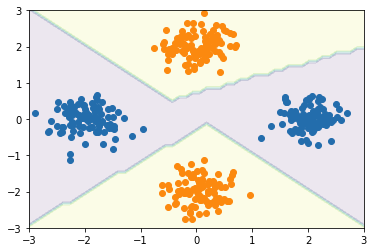

In [ ]:
# Test k-mean SVM by toy example
import torch
import matplotlib.pyplot as plt
from functions import *
import scipy.io as sio
from KmeanSVM import *

# Colab with GPU
X, Y = load_data("toy_example", os.path.join(GOOGLE_DRIVE_PATH, "Data/toy_data.mat"), "gpu")
plot_data(X.cpu(), Y.cpu())
# Colab with CPU
# X, Y = load_data("toy_example", os.path.join(GOOGLE_DRIVE_PATH, "toy_data.mat")) # four clusters
# plot_data(X, Y)
# Run locally with CPU
# X, Y = load_data("toy_example") # four clusters
# plot_data(X, Y)

KmSVM = KmeanSVM(K=2)
KmSVM.train(X, Y)
KmSVM.plot_classifier([-3, 3, -3, 3])

## Test cross validation on SVMGuide1 dataset

In [ ]:
from SVMGuide_loader import load_SVMGuide1
from KmeanSVM import *
x_train, y_train, x_test, y_test, mu, std = load_SVMGuide1(USE_COLAB, GOOGLE_DRIVE_PATH)
apply_KMSVM(x_train, y_train, x_test, y_test, cross=True)
# Max we get at: K = 4, lamb = 0.01, reg = 1e-05, and lr = 1 we get acc = 0.9662338495254517

at K = 2, lamb = 0.01, reg = 1e-09 and lr = 0.1 we get acc = 0.95941561460495
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 1 we get acc = 0.965584397315979
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 10 we get acc = 0.9607142210006714
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 50 we get acc = 0.9474025964736938
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 100 we get acc = 0.9561688303947449
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 0.1 we get acc = 0.95941561460495
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 1 we get acc = 0.9652597308158875
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 10 we get acc = 0.9607142210006714
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 50 we get acc = 0.9529220461845398
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 100 we get acc = 0.9571428298950195
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 0.1 we get acc = 0.95941561460495
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 1 we get acc = 0.965584397315979
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 10 we get acc 

(tensor([0.7562, 0.4774, 0.5429, 0.5277, 0.3373, 0.3969, 0.3245, 0.4064, 0.3901,
         0.3827, 0.3801, 0.3735, 0.2796, 0.3716, 0.4997, 0.3781, 0.3113, 0.3413,
         0.2089, 0.3115, 0.3344, 0.2510, 0.3229, 0.2584, 0.2443, 0.2648, 0.2657,
         0.1871, 0.3240, 0.2415, 0.2479, 0.2960, 0.2581, 0.2274, 0.2768, 0.2849,
         0.2013, 0.2384, 0.2431, 0.2335, 0.2421, 0.2645, 0.1801, 0.2059, 0.1734,
         0.2036, 0.2550, 0.2360, 0.2272, 0.2126, 0.1626, 0.1353, 0.2577, 0.2572,
         0.2549, 0.2408, 0.2158, 0.2442, 0.2115, 0.1914, 0.2131, 0.2071, 0.1943,
         0.1863, 0.1821, 0.2183, 0.2338, 0.1756, 0.2158, 0.1650, 0.2128, 0.2549,
         0.2261, 0.1528, 0.1719, 0.2192, 0.1345, 0.2270, 0.1554, 0.1864, 0.1719,
         0.2748, 0.1857, 0.1528, 0.1864, 0.1537, 0.1779, 0.0940, 0.1413, 0.1076,
         0.1829, 0.1956, 0.1999, 0.2184, 0.1299, 0.1230, 0.2004, 0.1531, 0.1009,
         0.1866, 0.1381, 0.1980, 0.2114, 0.1008, 0.1898, 0.1268, 0.1811, 0.2399,
         0.0993, 0.1146, 0.2

## Test cross validation on Minst o/e dataset

In [ ]:
import Mnist_loader as mnist
from KmeanSVM import *
x_train, y_train, x_test, y_test = mnist.load_odd_even_Mnist(num_train=1000, num_test=200, USE_COLAB=True, path=GOOGLE_DRIVE_PATH)
x_train, x_test, mu, std = mnist.preprocess_Mnist(x_train, x_test)
apply_KMSVM(x_train, y_train, x_test, y_test, cross=True)
# Max we get at: K = 2, lamb = 0.01, reg = 1e-07, and lr = 50 we get acc = 0.8619999885559082

at K = 2, lamb = 0.01, reg = 1e-09 and lr = 0.1 we get acc = 0.7989999651908875
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 1 we get acc = 0.8039999008178711
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 10 we get acc = 0.8489999771118164
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 50 we get acc = 0.8579999804496765
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 100 we get acc = 0.8539999723434448
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 0.1 we get acc = 0.7989999651908875
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 1 we get acc = 0.8039999008178711
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 10 we get acc = 0.8489999771118164
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 50 we get acc = 0.8579999804496765
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 100 we get acc = 0.8550000190734863
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 0.1 we get acc = 0.7970000505447388
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 1 we get acc = 0.8039999008178711
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 10 we 

(tensor([7.9876e+00, 1.9206e+01, 2.8101e+01, 2.1877e+01, 1.9012e+01, 1.1670e+01,
         8.1469e+00, 1.0232e+01, 5.7246e+00, 5.3484e+00, 4.7388e+00, 8.4043e+00,
         1.6346e+01, 1.1518e+01, 4.8142e+00, 5.8741e+00, 1.4232e+01, 5.8773e+00,
         2.9793e+00, 9.5004e+00, 5.2071e+00, 1.6546e+00, 5.6729e+00, 1.2317e+00,
         2.3965e+00, 2.1495e+00, 5.7601e-01, 1.4284e+00, 1.7369e+00, 3.2528e+00,
         3.7661e+00, 8.5090e-01, 1.6951e+00, 3.4138e-01, 1.3789e+00, 8.1959e-01,
         2.0499e+00, 1.1680e+00, 2.4006e+00, 1.1941e+00, 3.0815e-01, 8.3048e-01,
         4.6039e+00, 1.2991e+00, 1.8932e+00, 1.6172e+00, 4.8994e-01, 2.0352e+00,
         1.4267e+00, 9.7636e-01, 2.0069e+00, 2.7933e+00, 1.2982e+00, 3.3857e+00,
         2.2545e+00, 8.4385e-01, 2.0532e+00, 1.0645e+00, 1.5353e+00, 4.1964e-01,
         8.6650e-01, 1.3372e+00, 7.3890e-01, 1.4791e+00, 1.1675e+00, 1.1979e+00,
         4.3061e-01, 4.2615e-01, 9.7995e-01, 5.9395e-01, 6.1321e-01, 6.8931e-01,
         1.0085e-01, 2.8711e

## Test cross validation on Minst 3/8 dataset

In [ ]:
import Mnist_loader as mnist
from KmeanSVM import *
x_train, y_train, x_test, y_test = mnist.load_two_numbers_Mnist(num_train=1000, num_test=200, USE_COLAB=True, path=GOOGLE_DRIVE_PATH)
x_train, x_test, mu, std = mnist.preprocess_Mnist(x_train, x_test)
apply_KMSVM(x_train, y_train, x_test, y_test, cross=True)
# Max we get at: K = 2, lamb = 0.01, reg = 1e-05, and lr = 50 we get acc = 0.9699999690055847

at K = 2, lamb = 0.01, reg = 1e-09 and lr = 0.1 we get acc = 0.9019999504089355
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 1 we get acc = 0.9089999198913574
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 10 we get acc = 0.9519999623298645
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 50 we get acc = 0.968999981880188
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 100 we get acc = 0.968999981880188
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 0.1 we get acc = 0.9019999504089355
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 1 we get acc = 0.9089999198913574
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 10 we get acc = 0.9519999623298645
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 50 we get acc = 0.968999981880188
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 100 we get acc = 0.968999981880188
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 0.1 we get acc = 0.9019999504089355
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 1 we get acc = 0.9089999198913574
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 10 we get 

(tensor([ 4.4430, 13.7480,  3.5892,  2.8198,  1.9642,  3.7028,  2.1470,  1.0056,
          1.5825,  1.5847,  1.0079,  1.4564,  0.9023,  0.4559,  0.9733,  0.1858,
          0.6834,  0.6023,  0.1482,  0.1398,  0.2671,  0.0458,  0.5361,  0.1068,
          0.0767,  0.0459,  0.0459,  0.2277,  0.1172,  0.0458,  0.0728,  0.0458,
          0.0458,  0.0964,  0.1094,  0.0459,  0.0459,  0.0458,  0.0458,  0.0457,
          0.0457,  0.0794,  0.0456,  0.0456,  0.0456,  0.3634,  0.0490,  0.0456,
          0.0455,  0.0455,  0.0454,  0.0454,  0.0492,  0.0454,  0.0453,  0.0453,
          0.0452,  0.0452,  0.0451,  0.0451,  0.0451,  0.0450,  0.0450,  0.0705,
          0.0449,  0.0449,  0.0448,  0.1418,  0.0449,  0.0897,  0.0448,  0.0448,
          0.0448,  0.0447,  0.0447,  0.0446,  0.0446,  0.0445,  0.0445,  0.0444,
          0.0444,  0.0444,  0.0443,  0.0443,  0.0442,  0.0442,  0.0441,  0.0441,
          0.0440,  0.0440,  0.0440,  0.0439,  0.0439,  0.0438,  0.0438,  0.0437,
          0.0437,  0.0436,  

## Test cross validation on KDD dataset

In [ ]:
# load data
from KDD_loader import kdd_load
from KmeanSVM import *
train_x_full, train_y_full, test_x_full, test_y_full = kdd_load(USE_COLAB=True, GOOGLE_DRIVE=GOOGLE_DRIVE_PATH)
num_train, num_test = 1000, 200

# ramdom sample
temp_train_random_indices = np.random.permutation(train_x_full.shape[0]) # get random indices for all train set
temp_test_random_indices = np.random.permutation(test_x_full.shape[0]) # get random indices for all test set
train_indices = temp_train_random_indices[:num_train]
test_indices = temp_test_random_indices[:num_test]

# get num_train and num_test images and labels
x_train = train_x_full[train_indices]
y_train = train_y_full[train_indices]
x_test = test_x_full[test_indices]
y_test = test_y_full[test_indices]

print("dataset ready")
print("x_train", x_train.shape, "x_test", x_test.shape)

dataset ready
x_train torch.Size([1000, 3]) x_test torch.Size([200, 3])


In [ ]:
# test cross validation
apply_KMSVM(x_train, y_train, x_test, y_test, cross=True)
# Max we get at: K = 4, lamb = 0.01, reg = 1e-06, and lr = 0.1 we get acc = 0.9219999313354492

at K = 2, lamb = 0.01, reg = 1e-09 and lr = 0.1 we get acc = 0.8989999890327454
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 1 we get acc = 0.8579999804496765
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 10 we get acc = 0.8579999804496765
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 50 we get acc = 0.8919999003410339
at K = 2, lamb = 0.01, reg = 1e-09 and lr = 100 we get acc = 0.8949999809265137
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 0.1 we get acc = 0.8989999890327454
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 1 we get acc = 0.8579999804496765
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 10 we get acc = 0.8949999809265137
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 50 we get acc = 0.8649999499320984
at K = 2, lamb = 0.01, reg = 1e-08 and lr = 100 we get acc = 0.8739999532699585
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 0.1 we get acc = 0.900999903678894
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 1 we get acc = 0.8949999809265137
at K = 2, lamb = 0.01, reg = 1e-07 and lr = 10 we g

(tensor([1.0514e+05, 5.4450e+09, 4.8244e+09, 5.3643e+09, 4.1856e+09, 4.6838e+09,
         2.3169e+09, 4.4874e+09, 5.0284e+09, 2.0169e+09, 6.3277e+08, 2.4495e+09,
         1.6273e+09, 7.5242e+08, 1.9688e+09, 3.4879e+09, 9.4199e+08, 3.5586e+09,
         6.3526e+09, 3.6098e+09, 2.9919e+09, 2.1798e+09, 2.2852e+09, 2.2951e+09,
         1.3016e+09, 4.8769e+08, 1.1306e+09, 1.4431e+09, 6.3808e+08, 1.7910e+09,
         3.6717e+09, 2.5466e+09, 4.9083e+09, 3.4268e+09, 3.9226e+09, 4.4333e+09,
         3.6525e+09, 2.2064e+09, 9.2828e+08, 5.9202e+09, 3.5802e+09, 2.5218e+09,
         5.0536e+09, 1.6039e+09, 3.8654e+09, 2.1446e+09, 3.6191e+09, 6.9829e+09,
         3.5275e+09, 3.9427e+09, 1.4030e+09, 2.4446e+09, 1.3025e+09, 1.4486e+09,
         2.3038e+09, 6.2484e+09, 5.7502e+09, 4.9424e+09, 5.5732e+09, 3.7661e+09,
         3.2357e+09, 1.9202e+09, 3.0093e+09, 8.3437e+08, 3.3680e+09, 5.7025e+09,
         7.9515e+09, 5.1224e+09, 5.2915e+09, 6.0905e+09, 3.5436e+09, 5.5274e+09,
         2.9307e+09, 1.9765e

## Evaluate on Mnist, SVMGuide1, and KDD dataset with default parameters

In [ ]:
from Evaluate_models import *
from KmeanSVM import *

KMSVM = KmeanSVM()
KMSVM_time_oe, KMSVM_acc_oe, KMSVM_time_38, KMSVM_acc_38 = evaluate_using_mnist(KMSVM, USE_COLAB, GOOGLE_DRIVE_PATH)
KMSVM_time_svmg, KMSVM_acc_svmg = evaluate_using_SVM_Guide1(KMSVM, USE_COLAB, GOOGLE_DRIVE_PATH)
KMSVM_time_kdd, KMSVM_acc_kdd = evaluate_using_KDD(KMSVM, USE_COLAB, GOOGLE_DRIVE_PATH)

# KMSVM_time_oe, KMSVM_acc_oe, KMSVM_time_38, KMSVM_acc_38 = evaluate_using_mnist(KMSVM)
# KMSVM_time_svmg, KMSVM_acc_svmg = evaluate_using_SVM_Guide1(KMSVM)
# KMSVM_time_kdd, KMSVM_acc_kdd = evaluate_using_KDD(KMSVM)


print("Using KMSVM: Time = ", KMSVM_time_oe, "  acc = ", KMSVM_acc_oe)
print("Using KMSVM: Time = ", KMSVM_time_38, "  acc = ", KMSVM_acc_38)
print("Using KMSVM: Time = ", KMSVM_time_svmg, "  acc = ", KMSVM_acc_svmg)
print("Using KMSVM: Time = ", KMSVM_time_kdd, "  acc = ", KMSVM_acc_kdd)


W_hat torch.float32 cuda:0
W_hat torch.float32 cuda:0
Using KMSVM: Time =  3.5838005542755127   acc =  tensor(0.8126, device='cuda:0')


## Evaluate on Mnist, SVMGuide1, and KDD dataset with cross validation parameters

In [ ]:
from SVMGuide_loader import load_SVMGuide1
from KmeanSVM import *
x_train, y_train, x_test, y_test, mu, std = load_SVMGuide1(USE_COLAB, GOOGLE_DRIVE_PATH)
t_prev = time.time()
apply_KMSVM(x_train, y_train, x_test, y_test, K=4, lamb=0.01, reg=1e-5, lr=1)
comp_time = time.time() - t_prev
print("comp_time = ", comp_time)
# Max we get at: K = 4, lamb = 0.01, reg = 1e-05, and lr = 1 we get acc = 0.9662338495254517

In [ ]:
import Mnist_loader as mnist
from KmeanSVM import *
x_train, y_train, x_test, y_test = mnist.load_odd_even_Mnist(USE_COLAB=True, path=GOOGLE_DRIVE_PATH)
x_train, x_test, mu, std = mnist.preprocess_Mnist(x_train, x_test)
t_prev = time.time()
apply_KMSVM(x_train, y_train, x_test, y_test, K=2, lamb=0.01, reg=1e-7, lr=50)
comp_time = time.time() - t_prev
print("comp_time = ", comp_time)
# Max we get at: K = 2, lamb = 0.01, reg = 1e-07, and lr = 50 we get acc = 0.8619999885559082

In [ ]:
import Mnist_loader as mnist
from KmeanSVM import *
x_train, y_train, x_test, y_test = mnist.load_two_numbers_Mnist(USE_COLAB=True, path=GOOGLE_DRIVE_PATH)
x_train, x_test, mu, std = mnist.preprocess_Mnist(x_train, x_test)
t_prev = time.time()
apply_KMSVM(x_train, y_train, x_test, y_test, K=2, lamb=0.01, reg=1e-5, lr=50)
comp_time = time.time() - t_prev
print("comp_time = ", comp_time)
# Max we get at: K = 2, lamb = 0.01, reg = 1e-05, and lr = 50 we get acc = 0.9699999690055847

In [ ]:
# load data
from KDD_loader import kdd_load
from KmeanSVM import *
train_x_full, train_y_full, test_x_full, test_y_full = kdd_load(USE_COLAB=True, GOOGLE_DRIVE=GOOGLE_DRIVE_PATH)
t_prev = time.time()
apply_KMSVM(x_train, y_train, x_test, y_test, K=4, lamb=0.01, reg=1e-6, lr=0.1)
comp_time = time.time() - t_prev
print("comp_time = ", comp_time)
# Max we get at: K = 4, lamb = 0.01, reg = 1e-06, and lr = 0.1 we get acc = 0.9219999313354492